In [333]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm

# to remove spines at the top and right
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [86]:
data = pd.read_csv('../data/concat_data.csv', index_col=0)
data

,mortality_decrease,movement_energy,corridor_netws,corridor_year,buffer_netws,buffer_year
0,0.01,200.000000,29.0,4.0,0.0,-999.0
1,0.01,288.888889,56.0,2.0,38.0,5.0
2,0.01,377.777778,39.0,2.0,28.0,3.0
3,0.01,466.666667,50.0,2.0,7.0,95.0
4,0.01,555.555556,40.0,3.0,43.0,4.0
...,...,...,...,...,...,...
245,0.15,644.444444,58.0,2.0,67.0,13.0
246,0.15,733.333333,64.0,2.0,62.0,80.0
247,0.15,822.222222,55.0,4.0,62.0,3.0
248,0.15,911.111111,60.0,2.0,62.0,42.0


In [87]:
data['buff_occ'] = data.buffer_year != -999
data['corr_occ'] = data.corridor_year != -999

In [88]:
std_data = data.groupby(['mortality_decrease', 'movement_energy']).std()
mean_data = data.groupby(['mortality_decrease', 'movement_energy']).mean()

buffer_occupied = mean_data.buff_occ.values
corridor_occupied = mean_data.corr_occ.values

heat_data_buffers = pd.DataFrame(np.reshape(buffer_occupied, (10, 10)), 
                         index = np.round(np.unique(data['mortality_decrease']), 3), 
                         columns = np.round(np.unique(data['movement_energy'])) )


heat_data_corridors = pd.DataFrame(np.reshape(corridor_occupied, (10, 10)), 
                         index = np.round(np.unique(data['mortality_decrease']), 3), 
                         columns = np.round(np.unique(data['movement_energy'])) )

In [35]:
np.round(np.unique(data['mortality_decrease']), 3)

array([0.01 , 0.026, 0.041, 0.057, 0.072, 0.088, 0.103, 0.119, 0.134,
       0.15 ])

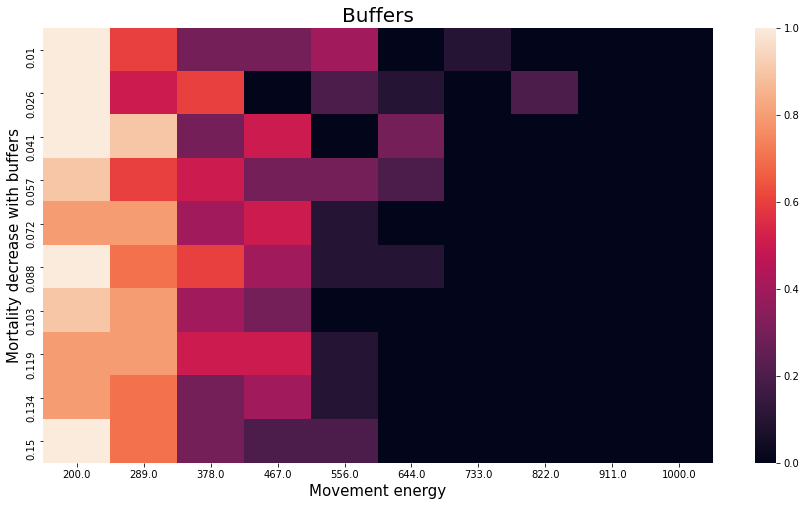

In [40]:
plt.figure(figsize= (15,8))
sns.heatmap(heat_data_buffers, annot=False, square = False)
plt.ylabel('Mortality decrease with buffers', size=15)
plt.xlabel('Movement energy', size=15)
plt.title('Buffers', size=20)
plt.show();

In [99]:
X, Y = data.movement_energy.values.reshape(-1, 1), data.buff_occ.values
log_reg_buffer = lm.LogisticRegression().fit(X,Y)

X, Y = data.movement_energy.values.reshape(-1, 1), data.corr_occ.values
log_reg_corridor = lm.LogisticRegression().fit(X,Y)

x_pred = np.linspace(200, 1000, 1000).reshape(-1,1)
y_pred_buffer =log_reg_buffer.predict_proba(x_pred)[:, 1]
y_pred_corridor =log_reg_corridor.predict_proba(x_pred)[:, 1]

In [353]:
swarm_x = np.tile(np.round(data.movement_energy), 2)
swarm_y = np.concatenate([data.buff_occ.values, data.corr_occ.values])
swarm_hue = np.concatenate([np.repeat('Buffer', 1000), np.repeat('Corridor', 1000)])

df_prep = {'x': swarm_x,
     'y': swarm_y,
     'Scenario': swarm_hue}

df = pd.DataFrame(df_prep)
#df.y = df.y.astype("category")



upper,lower =50, -50
mu,sigma = 0, 15
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
df['x_jit'] = df.x + X.rvs(2000)


upper,lower =0.4, -0.4
mu,sigma = 0, 0.1
X = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

df['y_jit'] = df.y + X.rvs(2000)

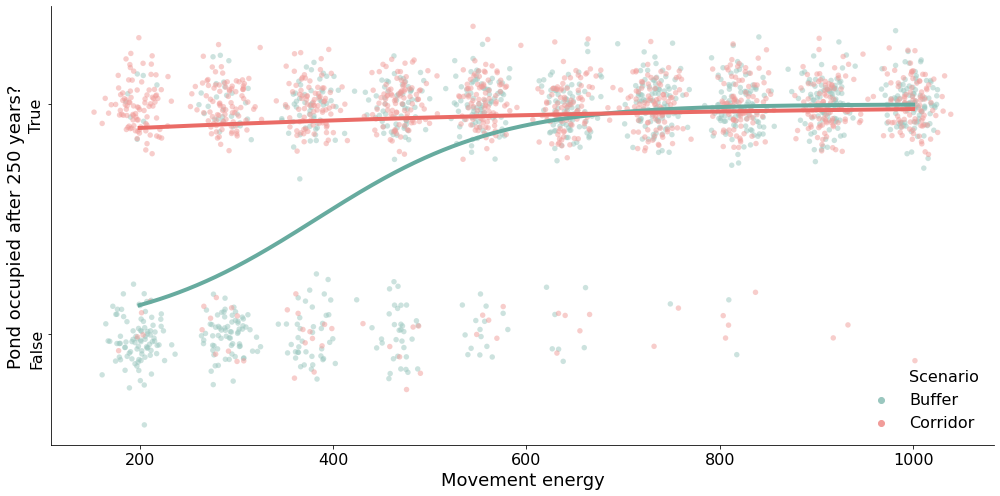

In [354]:
plt.figure(figsize=(14,7))

sns.scatterplot(data=df, x="x_jit", y="y_jit", hue="Scenario", alpha=0.5, s=30,
               palette=['#9AC7BF', '#F19C99'], edgecolor = None, linewidth = 0)

plt.plot(x_pred, y_pred_buffer, lw=4, color='#67AB9F')
plt.plot(x_pred, y_pred_corridor, lw=4, color='#EA6B66')

plt.ylabel('Pond occupied after 250 years?', size=18)
plt.xlabel('Movement energy', size=18)
plt.yticks([0,1], ['False','True'], rotation=90, size=16)
plt.xticks(size=16)
plt.legend(frameon=False, prop={'size': 16})
plt.tight_layout()
plt.savefig('../results/occ_ponds.png', dpi=400);

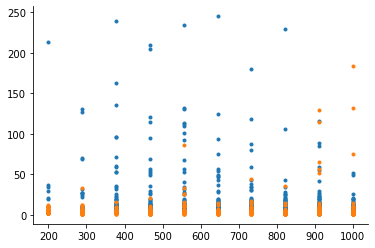

In [368]:
buffer_df = data[['movement_energy', 'buffer_year']]
buffer_df = buffer_df[buffer_df.buffer_year != -999]

corridor_df = data[['movement_energy', 'corridor_year']]
corridor_df = corridor_df[corridor_df.corridor_year != -999]

plt.plot(buffer_df.movement_energy, buffer_df.buffer_year, '.')
plt.plot(corridor_df.movement_energy, corridor_df.corridor_year, '.')

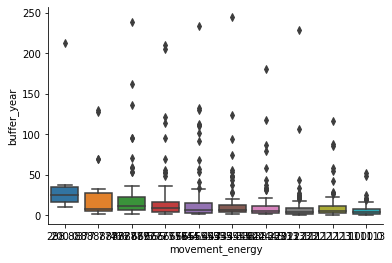

In [375]:
sns.boxplot(data=buffer_df, y='buffer_year', x='movement_energy');

In [370]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='day', ylabel='total_bill'>

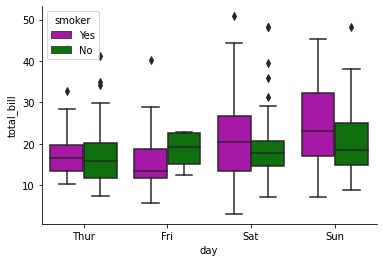

In [371]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)